In [13]:
import os
import numpy as np
import cv2
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
path = '/home/mr1142/Documents/Data/segmentation/'
val_names = os.listdir('/home/mr1142/Documents/Data/segmentation/mascara')

In [5]:
def apply_mask(img, mask):
    img[mask!=1]=0
    return img

In [6]:
def read_img(path, folder, img):
    img = cv2.imread(os.path.join(path, folder, img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (pixels, pixels))
    img = np.expand_dims(img, axis=-1)
    return img

In [7]:
def normalize(img):
    return (img - np.mean(img))/ np.std(img)

In [8]:
def binarize(img):
    img[img>0] = 1
    return img

In [9]:
pixels = 256

In [10]:
from tensorflow.keras import backend as K

def dice_coef(y_true, y_pred, smooth=100):        
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [29]:
unet_model = keras.models.load_model('/home/mr1142/Documents/Data/models/unet_3chanels.h5', 
                                     custom_objects={"dice_coef_loss": dice_coef_loss, "dice_coef": dice_coef})

IndexError: boolean index did not match indexed array along dimension 2; dimension is 1 but corresponding boolean dimension is 3

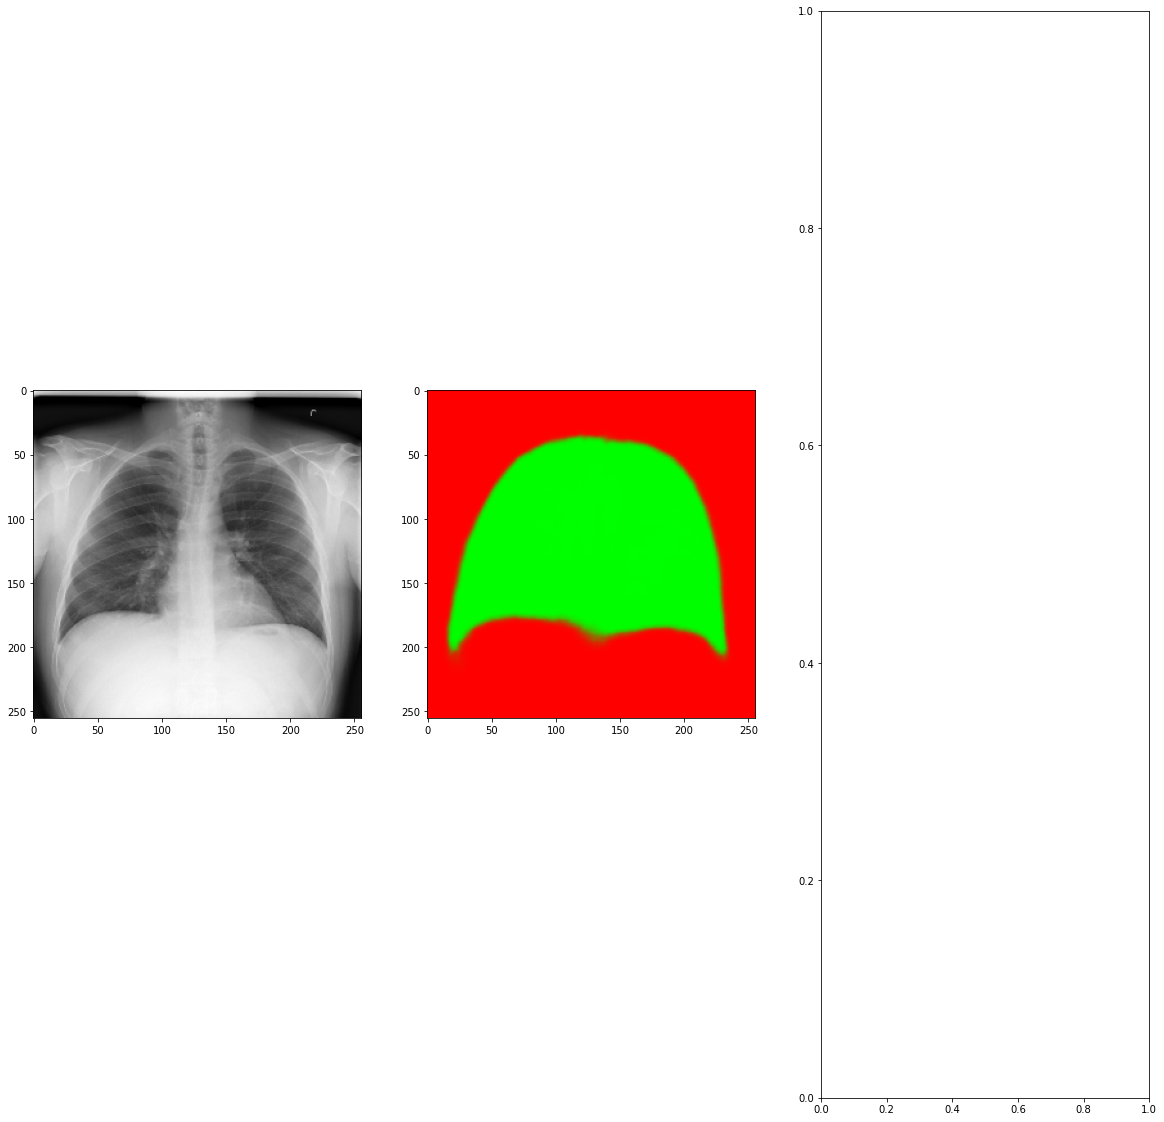

In [44]:
r = np.random.randint(0, len(val_names))
img = normalize(read_img(path, 'images', val_names[r]))
mask = unet_model.predict(img[np.newaxis,...])[0,...]
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(apply_mask(img, mask), cmap = 'gray')
plt.show()